# INTELLIGENT RAIL

## Edward Jackson

##### Notebook 2 of 6 - Feature engineering - speed limits prep

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString, shape

First, we import geodata for all the French regions. This will be used to determine which region a particular speed limit falls within.

In [2]:
gdf = gpd.read_file('data/french_regions.geojson')

In [3]:
gdf

,nom,code,geometry
0,Île-de-France,11,"POLYGON ((2.59052 49.07966, 2.60913 49.09156, ..."
1,Champagne-Ardenne,21,"POLYGON ((4.04797 49.40564, 4.04913 49.40901, ..."
2,Picardie,22,"POLYGON ((3.48519 48.85191, 3.48016 48.85160, ..."
3,Haute-Normandie,23,"POLYGON ((0.81482 48.67017, 0.81018 48.67135, ..."
4,Centre,24,"POLYGON ((2.28105 46.42041, 2.27628 46.42128, ..."
5,Basse-Normandie,25,"MULTIPOLYGON (((-0.86036 48.50146, -0.86450 48..."
6,Bourgogne,26,"POLYGON ((3.62942 46.74946, 3.62640 46.75227, ..."
7,Nord-Pas-de-Calais,31,"POLYGON ((4.14090 49.97876, 4.13638 49.97751, ..."
8,Lorraine,41,"POLYGON ((5.47006 48.42093, 5.46837 48.42368, ..."
9,Alsace,42,"POLYGON ((7.19828 48.31048, 7.19670 48.31372, ..."


Each region is defined by a polygon or multiple polygons. We can access each polygon within a *MULTIPOLYGON* individually. The polygons associated with *Provence-Alpes-Côte d'Azur* are as follows:

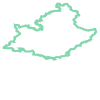

In [4]:
region = gdf.geometry.iloc[20][0]
region.exterior

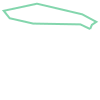

In [5]:
region = gdf.geometry.iloc[20][1]
region.exterior

Multipolygons seem to exist for multiple regions. However, the second polygon is always fairly non-descript, most probably much smaller geographical extremities which are magnified to fit a default image size. As the largest land mass is always represented in the first polygon, we will extract the first polygon in each case only:

In [6]:
multi_polygons = [5, 10,11,12,13,14,15, 20,21]    # indices of MULTIPOLYGONs

for row in multi_polygons:
    gdf.geometry.iloc[row] = gdf.geometry.iloc[row][0]    # overwriting with 1st polygon only

In [7]:
gdf

,nom,code,geometry
0,Île-de-France,11,"POLYGON ((2.59052 49.07966, 2.60913 49.09156, ..."
1,Champagne-Ardenne,21,"POLYGON ((4.04797 49.40564, 4.04913 49.40901, ..."
2,Picardie,22,"POLYGON ((3.48519 48.85191, 3.48016 48.85160, ..."
3,Haute-Normandie,23,"POLYGON ((0.81482 48.67017, 0.81018 48.67135, ..."
4,Centre,24,"POLYGON ((2.28105 46.42041, 2.27628 46.42128, ..."
5,Basse-Normandie,25,"POLYGON ((-0.86036 48.50146, -0.86450 48.49989..."
6,Bourgogne,26,"POLYGON ((3.62942 46.74946, 3.62640 46.75227, ..."
7,Nord-Pas-de-Calais,31,"POLYGON ((4.14090 49.97876, 4.13638 49.97751, ..."
8,Lorraine,41,"POLYGON ((5.47006 48.42093, 5.46837 48.42368, ..."
9,Alsace,42,"POLYGON ((7.19828 48.31048, 7.19670 48.31372, ..."


Next, we import the SNCF data file for speed limits. This file covers the entire French rail network so we will need extract only the data associated with the line codes on the high-speed network.

In [8]:
speed = pd.read_csv('data/speed_limit_shapefiles.csv', delimiter=';')

In [9]:
speed.shape

(2386, 19)

In [10]:
speed.head()

,CODE_LIGNE,LIB_LIGNE,V_MAX,RG_TRONCON,PKD,PKF,IDGAIA,X_D_L93,Y_D_L93,X_F_L93,Y_F_L93,X_D_WGS84,Y_D_WGS84,X_F_WGS84,Y_F_WGS84,C_GEO_D,C_GEO_F,Geo Point,Geo Shape
0,272000,Ligne de Paris-Nord à Lille,60,1,000+000,000+888,779897fc-e28c-11e8-92ff-01b064e0362d,6.527823e+05,6.864817e+06,6.528570e+05,6.865690e+06,2.356160,48.881642,2.357082,48.889496,"48.881641942,2.35616002257","48.8894957235,2.35708178089","48.8854888653,2.3571421015","{""type"": ""LineString"", ""coordinates"": [[2.3561..."
1,995000,Ligne de Bastia à Ajaccio (ligne centrale),60,1,083+000,084+400,77909ae6-e28c-11e8-92ff-01b064e0362d,1.210921e+06,6.147773e+06,1.210209e+06,6.146649e+06,9.186537,42.249886,9.176887,42.240317,"42.24988584,9.18653655518","42.2403170133,9.17688742059","42.2455711122,9.18130193841","{""type"": ""LineString"", ""coordinates"": [[9.1865..."
2,594000,Ligne de Joué-lès-Tours à Châteauroux,85,1,263+224,282+708,779eb930-e28c-11e8-92ff-01b064e0362d,5.368357e+05,6.686496e+06,5.484843e+05,6.671933e+06,0.842118,47.258705,1.000979,47.130402,"47.25870538,0.842117894627","47.1304019626,1.00097888479","47.1992672886,0.929996889778","{""type"": ""LineString"", ""coordinates"": [[0.8421..."
3,317000,Ligne de Rochy-Condé à Soissons,30,1,007+600,013+921,77a183d4-e28c-11e8-92ff-01b064e0362d,6.402843e+05,6.922094e+06,6.451003e+05,6.924220e+06,2.177620,49.395539,2.243660,49.415076,"49.3955393391,2.17762043725","49.4150758543,2.24366020034","49.3989757894,2.21270072699","{""type"": ""LineString"", ""coordinates"": [[2.1776..."
4,70000,Ligne de Noisy-le-Sec à Strasbourg-Ville,160,1,143+600,171+298,7796913e-e28c-11e8-92ff-01b064e0362d,7.721240e+05,6.882359e+06,7.981394e+05,6.874279e+06,3.986409,49.037064,4.340277,48.960965,"49.0370642998,3.98640938736","48.9609646656,4.34027693822","49.00785764,4.1657026048","{""type"": ""LineString"", ""coordinates"": [[3.9864..."


We see that there are 2,386 rows of speed limit data for the French network. Although there are 19 columns, we will only need the following:
- **CODE_LIGNE** - line codes
- **V_MAX** - indicated speed limit
- **Geo Point** - coordinates of the *centre* of the section of line

In [11]:
speed = speed[['CODE_LIGNE','V_MAX','Geo Point']]

In [12]:
# line codes known from cleaning of line data
lgv_lines = ['905000', '830000', '1000', '70000', '750000', '640000', '752000',
       '897000', '14000', '900000', '677000', '420000', '930000',
       '890000', '515000', '538000', '850000', '468000', '226000',
       '441000', '470000', '278000', '429000', '431000', '89000', '5000',
       '301000', '752100', '262000', '450000', '216000', '226310',
       '834000', '768300']

In [13]:
speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CODE_LIGNE  2386 non-null   int64 
 1   V_MAX       2386 non-null   int64 
 2   Geo Point   2386 non-null   object
dtypes: int64(2), object(1)
memory usage: 56.0+ KB


In order to filter the speed limit rows associated with the high-speed network, we must convert the **CODE_LIGNE** datatype to string.

In [14]:
speed = speed.astype({'CODE_LIGNE':'str'})

In [15]:
len(speed[speed['CODE_LIGNE'].isin(lgv_lines)])

403

We see that there are 403 matching rows so we will extract these for the next steps.

In [16]:
speed = speed[speed['CODE_LIGNE'].isin(lgv_lines)]

In [17]:
speed = speed.reset_index(drop=True)

In [18]:
speed.head()

,CODE_LIGNE,V_MAX,Geo Point
0,70000,160,"49.00785764,4.1657026048"
1,830000,140,"43.3622661355,5.32848289724"
2,1000,160,"48.5683249997,3.03627692472"
3,640000,130,"44.0922968827,1.02423068643"
4,420000,130,"48.4602808473,1.48424646238"


We extract the latitude and longitude separately.

In [19]:
speed[['longitude','latitude']] = speed['Geo Point'].str.split(',', expand=True)

In [20]:
speed.head()

,CODE_LIGNE,V_MAX,Geo Point,longitude,latitude
0,70000,160,"49.00785764,4.1657026048",49.00785764,4.1657026048
1,830000,140,"43.3622661355,5.32848289724",43.3622661355,5.32848289724
2,1000,160,"48.5683249997,3.03627692472",48.5683249997,3.03627692472
3,640000,130,"44.0922968827,1.02423068643",44.0922968827,1.02423068643
4,420000,130,"48.4602808473,1.48424646238",48.4602808473,1.48424646238


In [21]:
speed = speed.drop(columns='Geo Point')

In [22]:
# set datatypes to float rather than string for purposes of geo mapping
speed = speed.astype({'latitude':'float','longitude':'float'})

We iterate over each row of both geodata and speed limit dataframes, testing whether each coordinate falls inside each region and returning the correct label.

In [23]:
# list to store region names in order of rows in the dataframe
region_name = []

# iterate over each row of speed data
for speed_row in range (0,len(speed)):
    
    # save geopoint to variable
    section = Point(speed['latitude'][speed_row], speed['longitude'][speed_row])
    #print(section)
    
    # iterate over each row of geodata
    for row in range(0,len(gdf)):
    
        # save each row of geodata to variable in turn
        region = gdf.geometry.iloc[row]
        
        # if geopoint falls within region geodata, record region name to list
        if region.contains(section)==True:
            response = gdf.nom[row]
            
    region_name.append(response)
    
    # progress bar
    print(f'Line{speed_row} out of {len(speed)-1} rows completed', end='\r')

In [24]:
# save list to new column
speed['region']=region_name

In [25]:
speed.head()

,CODE_LIGNE,V_MAX,longitude,latitude,region
0,70000,160,49.007858,4.165703,Champagne-Ardenne
1,830000,140,43.362266,5.328483,Provence-Alpes-Côte d'Azur
2,1000,160,48.568325,3.036277,Île-de-France
3,640000,130,44.092297,1.024231,Midi-Pyrénées
4,420000,130,48.460281,1.484246,Centre


In [26]:
speed.isna().sum()

CODE_LIGNE    0
V_MAX         0
longitude     0
latitude      0
region        0
dtype: int64

In [27]:
speed['region'].unique()

array(['Champagne-Ardenne', "Provence-Alpes-Côte d'Azur", 'Île-de-France',
       'Midi-Pyrénées', 'Centre', 'Rhône-Alpes', 'Pays de la Loire',
       'Franche-Comté', 'Bourgogne', 'Languedoc-Roussillon', 'Bretagne',
       'Lorraine', 'Nord-Pas-de-Calais', 'Picardie', 'Poitou-Charentes',
       'Alsace', 'Auvergne', 'Basse-Normandie', 'Aquitaine'], dtype=object)

We see that there are no missing values and each region has been listed correctly.

However, we must check whether any lines have more than one speed restriction in any one region. Here we check the main line 70 (Paris to Strasbourg route) in Alsace.

In [28]:
len(speed[(speed['region']=='Alsace') & (speed['CODE_LIGNE']=='70000')])

3

Although far from an exact science, we take the mean speed restriction per line per region to create a new feature which will indicate a *degree of restriction* on sections of line. However, this creates a biased weighting as some lines may have no speed restrictions but would have *0* as their speed restriction. To get round this, we will assume a national standard of 320km/h for all line sections without restrictions (added later when features are merged). There are limitations here as we do not know whether a line in any region actually has a section AT the national standard speed. However, this would involve far more granular research and this is outside the scope of this project.

In [29]:
avg_speed_restriction = speed.groupby(['region','CODE_LIGNE'])['V_MAX'].mean()

In [30]:
speed_finalised = pd.DataFrame(avg_speed_restriction).reset_index()

In [31]:
speed_finalised.head()

,region,CODE_LIGNE,V_MAX
0,Alsace,1000,150.000000
1,Alsace,5000,230.000000
2,Alsace,70000,143.333333
3,Alsace,930000,80.000000
4,Aquitaine,640000,155.000000


##### Exporting finalised data

In [32]:
speed_finalised.to_csv('data/speed_finalised.csv', index=False)